In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

import string
import re


# Data Collection

I dataset considerati come input del nostro processo di Data Integration  - e quindi di Schema Matching - sono rappresentati come dataframe Pandas.


Per una introduzione ed alcuni richiami su pandas vedere il materiale 
[moodle](https://moodle.unimore.it/course/view.php?id=4836)
dello scorso anno, lezione   Venerdì 01/10/2021:

*  [Pandas (video 2020)](https://unimore365.sharepoint.com/:v:/s/InsegnamentoPercorso_2021_20-262_2009_IIM-43_S1_2_2020/EVwlyfxG0PNKt53rK_p4rbcBE59n9mPx2U6ybo-ZNLIM4g?e=0xhA0P)            [Notebook](https://moodle.unimore.it/pluginfile.php/13188/course/section/9899/2020_Pandas.ipynb)


* [JoinMerge (video 2020)](https://unimore365.sharepoint.com/:v:/s/InsegnamentoPercorso_2021_20-262_2009_IIM-43_S1_2_2020/EewjR434-8lElZpamK7yim0BTZQDKgI3B8jPtWW9O7o_mg?e=L7Buem)  [Notebook](https://moodle.unimore.it/pluginfile.php/13188/course/section/9899/2020_Pandas_Join_Merge.ipynb)




## Local Sources

Lo schema matching viene effettuato tra due dataframe TableA e TableB  i cui schemi (attributi) sono le  rispettive colonne


In [2]:
# Ad esempio, verranno considerati dataset/dataframe vuoti (solo lo schema, senza i dati)
SchemaA=['ID', 'Name', 'Vorname', 'Alter']
SchemaB=['No', 'Name', 'First_name', 'Age']

TableA = pd.DataFrame(columns=SchemaA)
TableB = pd.DataFrame(columns=SchemaB)

# Lo schema di A si ottiene come
TableA.columns.tolist()

['ID', 'Name', 'Vorname', 'Alter']

In [3]:
TableA

,ID,Name,Vorname,Alter


In [4]:
# oppure considereremo  dataset "reali"
TableA = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/rotten_tomatoes.csv')
TableB = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/imdb.csv')
# Lo schema di A si ottiene come
print(TableA.columns.tolist())

['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors', 'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount', 'ReviewCount', 'Genre', 'Filming Locations', 'Description']


In [5]:
TableB.head()

,Id,Name,YearRange,ReleaseDate,Director,Creator,Cast,Duration,RatingValue,ContentRating,Genre,Url,Description
0,city_of_missing_girls,City of Missing Girls,1940 1941 1942,"Mar 27, 1941 Wide",Elmer Clifton,"Oliver Drake,George Rosener",NaN,1 hr. 13 min.,NaN,Unrated,"Drama,Mystery & Suspense,Classics",http://www.rottentomatoes.com/m/city_of_missin...,"In this murder mystery, a female reporter inve..."
1,gay_divorcee,The Gay Divorcee,1933 1934 1935,"Oct 12, 1934 Limited",Mark Sandrich,"J. Hartley Manners,George Marion,Dorothy Yost,...",NaN,1 hr. 47 min.,7.8/10,Unrated,"Drama,Romance,Musical & Performing Arts,Classi...",http://www.rottentomatoes.com/m/gay_divorcee/,One of the finest Fred Astaire and Ginger Roge...
2,divorcee,The Divorcée,1929 1930 1931,"Apr 19, 1930 Wide",Robert Z. Leonard,"Ursula Parrott,John Meehan,John Meehan, Jr.,Jo...",NaN,1 hr. 23 min.,6.4/10,Unrated,"Drama,Romance,Classics",http://www.rottentomatoes.com/m/divorcee/,Norma Shearer earned an Academy Award for play...
3,1009470-hells_angels_on_wheels,Hells Angels on Wheels,1966 1967 1968,"Jan 1, 1967 Wide",Richard Rush,Robert Wright Campbell,"Adam Roarke,Jack Nicholson,Sabrina Scharf,Jana...",1 hr. 35 min.,4.4/10,R,"Classics,Action & Adventure",http://www.rottentomatoes.com/m/1009470-hells_...,"Jack Nicholson, in one of his earliest roles, ..."
4,the-miracle-woman-1932,The Miracle Woman,1984 1985 1986,"Jan 1, 1985 Wide",Ketan Mehta,"Shafi Hakim,Hriday Lani",NaN,NaN,NaN,Unrated,Drama,http://www.rottentomatoes.com/m/the-miracle-wo...,NaN


In [6]:
# a volte costruiremo  dataset ad hoc :
TableA = pd.DataFrame({'A1': ['rossi','sugo','verde','tre'],
                       'A2': ['rosi','verd','iom','new']})
TableB = pd.DataFrame({'B1': ['rossi','ugo'],'B2': ['verde','rossi'], })
TableA

,A1,A2
0,rossi,rosi
1,sugo,verd
2,verde,iom
3,tre,new


# Schema Matching Methods
La prima fase consiste nel calcolare la similarità
tra coppie di attributi dei due schemi; il risultato è una 
**Similarity Matrix** 



## Similarity Matrix

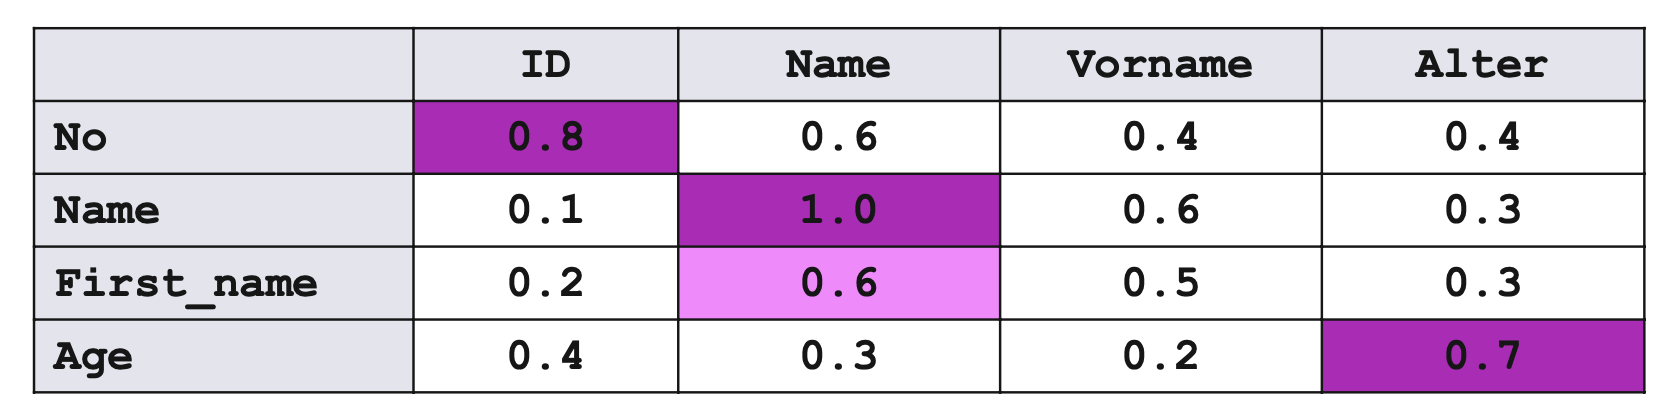


La Similarity Matrix la rappresenteremo come un dataframe con indice lo schema  di A e come colonne lo schema di B (o viceversa).

In [7]:
TableA = pd.DataFrame(columns=['ID', 'Name', 'Vorname', 'Alter'])
TableB = pd.DataFrame(columns=['No', 'Name', 'First_name', 'Age'])

# La Similarity Matrix  dell'esempio delle slide - inizialmente con valore indefiniti NaN - si ottiene quindi come

SimMatrix = pd.DataFrame(columns=TableA.columns.tolist(),index=TableB.columns.tolist())
SimMatrix


,ID,Name,Vorname,Alter
No,NaN,NaN,NaN,NaN
Name,NaN,NaN,NaN,NaN
First_name,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN


In [8]:
# la possiamo inizializzare con valori casuali 
SimMatrix = pd.DataFrame(np.random.rand(16).reshape(4,4), columns=TableA.columns.tolist(),index=TableB.columns.tolist())
SimMatrix

,ID,Name,Vorname,Alter
No,0.701141,0.189706,0.340027,0.333895
Name,0.948543,0.744019,0.332173,0.918864
First_name,0.440251,0.411243,0.382905,0.959952
Age,0.814569,0.040176,0.861467,0.104937


## Similarity Table

Per *semplicità* di calcolo 
rappresentiamo la Similarity Matrix come una  **Similarity Table**

 **SimTable(A,B,sim)**
 
dove in A (B) metteremo rispettivamente gli attributi di TableA (TableB),
 e quindi le colonne (righe) della matrice.
 
La chiave è ovviamente A,B

La trasformazione di SimMatrix in SimTable è basata sull'operazione [stack](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)

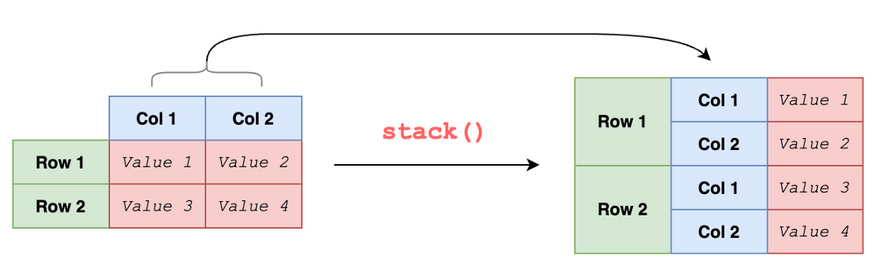

In [9]:
SimMatrix.stack()

No          ID         0.701141
            Name       0.189706
            Vorname    0.340027
            Alter      0.333895
Name        ID         0.948543
            Name       0.744019
            Vorname    0.332173
            Alter      0.918864
First_name  ID         0.440251
            Name       0.411243
            Vorname    0.382905
            Alter      0.959952
Age         ID         0.814569
            Name       0.040176
            Vorname    0.861467
            Alter      0.104937
dtype: float64

In [10]:
# SimMatrix.stack() è una serie che ha un indice multilivello 
# usando reset_index si genera un dataframe
SimMatrix.stack().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  16 non-null     object 
 1   level_1  16 non-null     object 
 2   0        16 non-null     float64
dtypes: float64(1), object(2)
memory usage: 512.0+ bytes


In [11]:
# in reset_index possiamo specificare il nome della colonna 0 che conteneva i valori della serie
SimMatrix.stack().reset_index(name='sim').head()

,level_0,level_1,sim
0,No,ID,0.701141
1,No,Name,0.189706
2,No,Vorname,0.340027
3,No,Alter,0.333895
4,Name,ID,0.948543


In [12]:
# quindi rinominiamo  le altre colonne  
SimMatrix.stack().reset_index(name='sim').rename(columns={'level_0':'B','level_1':'A'}).head()

,B,A,sim
0,No,ID,0.701141
1,No,Name,0.189706
2,No,Vorname,0.340027
3,No,Alter,0.333895
4,Name,ID,0.948543


In [13]:
# per mettere prima A e poi B
SimMatrix.stack().reset_index(name='sim').rename(columns={'level_0':'B','level_1':'A'})[['A','B','sim']].head()


,A,B,sim
0,ID,No,0.701141
1,Name,No,0.189706
2,Vorname,No,0.340027
3,Alter,No,0.333895
4,ID,Name,0.948543


In [14]:
# definisco una funzione per questa operazione
def ToSimTable(SimMatrix:pd.DataFrame):
    return SimMatrix.stack().reset_index(name='sim').rename(columns={'level_0':'B','level_1':'A'})[['A','B','sim']]

In [15]:
SimTable=ToSimTable(SimMatrix)
SimTable.head()

,A,B,sim
0,ID,No,0.701141
1,Name,No,0.189706
2,Vorname,No,0.340027
3,Alter,No,0.333895
4,ID,Name,0.948543


Viceversa per  passare dalla SimTable alla Similarity Matrix  si può usare [pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)

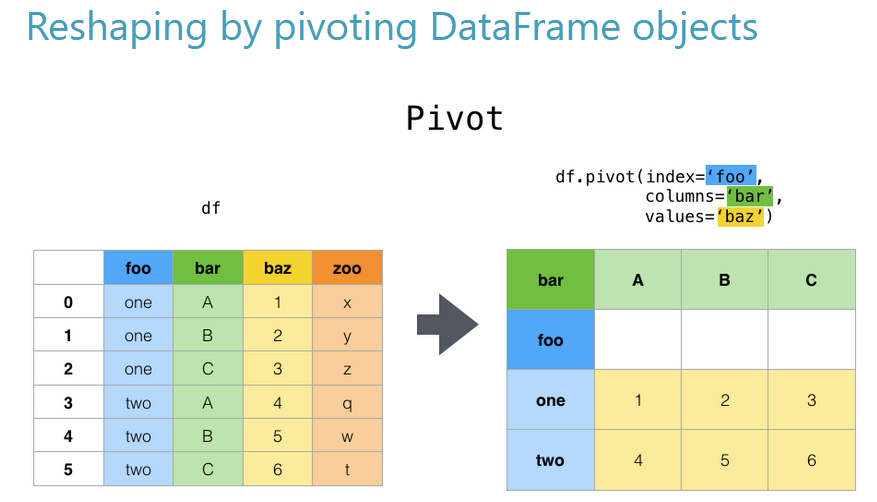

In [16]:
SimTable.head()

,A,B,sim
0,ID,No,0.701141
1,Name,No,0.189706
2,Vorname,No,0.340027
3,Alter,No,0.333895
4,ID,Name,0.948543


In [17]:
# per riottenere la "matrice" iniziale che ha sulle colonne A e sulle righe B
SimTable.pivot(index='B', columns='A',values='sim')

A,Alter,ID,Name,Vorname
B,,,,
Age,0.104937,0.814569,0.040176,0.861467
First_name,0.959952,0.440251,0.411243,0.382905
Name,0.918864,0.948543,0.744019,0.332173
No,0.333895,0.701141,0.189706,0.340027


In [18]:
SimTable.pivot(index='B', columns='A',values='sim').rename_axis(None, axis=1)

,Alter,ID,Name,Vorname
B,,,,
Age,0.104937,0.814569,0.040176,0.861467
First_name,0.959952,0.440251,0.411243,0.382905
Name,0.918864,0.948543,0.744019,0.332173
No,0.333895,0.701141,0.189706,0.340027


In [19]:
SimTable.pivot(index='B', columns='A',values='sim').rename_axis(None, axis=1).rename_axis(None, axis=0)

,Alter,ID,Name,Vorname
Age,0.104937,0.814569,0.040176,0.861467
First_name,0.959952,0.440251,0.411243,0.382905
Name,0.918864,0.948543,0.744019,0.332173
No,0.333895,0.701141,0.189706,0.340027


In [20]:
def ToSimMatrix(SimTable:pd.DataFrame):
    return SimTable.pivot(index='B', columns='A',values='sim').rename_axis(None, axis=1).rename_axis(None, axis=0)

In [21]:
# (ri)verifichiamo il tutto
RandomSimMatrix = pd.DataFrame(np.random.rand(16).reshape(4,4), columns=TableA.columns.tolist(),index=TableB.columns.tolist())
RandomSimMatrix

,ID,Name,Vorname,Alter
No,0.463830,0.132270,0.793886,0.305185
Name,0.326217,0.004320,0.348206,0.319778
First_name,0.890164,0.983563,0.275223,0.550635
Age,0.238706,0.600430,0.244232,0.620356


In [22]:
RandomSimTable=ToSimTable(RandomSimMatrix)
RandomSimTable.head()

,A,B,sim
0,ID,No,0.463830
1,Name,No,0.132270
2,Vorname,No,0.793886
3,Alter,No,0.305185
4,ID,Name,0.326217


In [23]:
ToSimMatrix(RandomSimTable)

,Alter,ID,Name,Vorname
Age,0.620356,0.238706,0.600430,0.244232
First_name,0.550635,0.890164,0.983563,0.275223
Name,0.319778,0.326217,0.004320,0.348206
No,0.305185,0.463830,0.132270,0.793886


## Prodotto Cartesiano (Cross Product)

Considerando i due dataset da sottoporre al processo di schema matching, TableA e TableB,
la Similarity Matrix e la Similarity Table rappresentano
tutte le possibili coppie degli attributi di TableA e degli attributi di TableB,
ovvero  il *Prodotto Cartesiano*
degli attributi di TableA per gli attributi di TableB

Rendiamo esplicito questo aspetto, calcolando le coppie di attributi
della Similarity Table come prodotto cartesiano

In [24]:
TableA = pd.DataFrame(columns=['ID', 'Name', 'Vorname', 'Alter'])
TableB = pd.DataFrame(columns=['No', 'Name', 'First_name', 'Age'])

SchemaA=TableA.columns.tolist()
SchemaB=TableB.columns.tolist()

In [25]:
# inserisco in una tabella DA(A) tutti gli attributi di  SchemaA
DA=pd.DataFrame({'A': SchemaA})
# e in una tabella DB(B) tutti gli attributi di  SchemaB
DB=pd.DataFrame({'B': SchemaB})
# visualizziamo ad esempio DA
DA

,A
0,ID
1,Name
2,Vorname
3,Alter


In [26]:
DB

,B
0,No
1,Name
2,First_name
3,Age


il prodotto cartesiano equivale ad un join tra DA e DB con *condizione sempre true*, allora si aggiunge ad entrambi i dataset un attributo *key* sempre uguale a 1, e si effettua il join (il merge in Pandas) su tale attributo.

* Per approfondire: [JoinMerge (video 2020)](https://unimore365.sharepoint.com/:v:/s/InsegnamentoPercorso_2021_20-262_2009_IIM-43_S1_2_2020/EewjR434-8lElZpamK7yim0BTZQDKgI3B8jPtWW9O7o_mg?e=L7Buem)  [Notebook](https://moodle.unimore.it/pluginfile.php/13188/course/section/9899/2020_Pandas_Join_Merge.ipynb)


In [27]:
DA['key']=1
DB['key']=1
DA.merge(DB).head()

,A,key,B
0,ID,1,No
1,ID,1,Name
2,ID,1,First_name
3,ID,1,Age
4,Name,1,No


In [28]:
# si elimina quindi key
DA.merge(DB, on = 'key').drop('key', 1).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,A,B
0,ID,No
1,ID,Name
2,ID,First_name
3,ID,Age
4,Name,No


In [29]:
# per considerare il FutureWarning
DA.merge(DB, on = 'key').drop(columns='key').head()

,A,B
0,ID,No
1,ID,Name
2,ID,First_name
3,ID,Age
4,Name,No


In [30]:
# sintetizziamo in un'unica espressione
DA.assign(key=1).merge(DB.assign(key=1), on="key").drop(columns='key').head()


,A,B
0,ID,No
1,ID,Name
2,ID,First_name
3,ID,Age
4,Name,No


## Potete riscrivere/ristrutturare queste funzioni

Le strutture e le funzioni introdotte possono essere riscritte/riformulate nel proprio notebook.
Ad esempio, nella tesina di Mirco Botti sono state ristrutturate le precedenti funzioni come segue:

In [31]:
def sim_table(TableA:pd.DataFrame, TableB:pd.DataFrame):
    A = pd.DataFrame({"A": TableA.columns})
    B = pd.DataFrame({"B": TableB.columns})
    S = A.assign(key=1).merge(B.assign(key=1), on="key").drop("key", axis=1)
    return S
    
def random_sim_table(TableA:pd.DataFrame, TableB:pd.DataFrame):
    S = sim_table(TableA, TableB)
    S["sim"] = np.random.rand(len(S))
    return S


def to_sim_table(SimMatrix:pd.DataFrame):
    return SimMatrix.stack().reset_index(name="sim")

def to_sim_matrix(SimTable:pd.DataFrame):
    return SimTable.pivot(index="A", columns="B", values="sim")

Nel seguito useremo sia quelle introdotte a lezione 
sia la funzione *sim_table* utile per creare la Similarity Table senza passare 
dalla Similarity Matrix.

Durante l'esame orale ci può essere una domanda sullo schema matching, basata su un piccolo esercizio da svolgere tramite questi notebook.
Durante l'esame potete usare il vostro notebook, quindi eventuali strutture/funzioni che avete aggiunto/riscritto!!

In alcuni notebook degli anni precedenti ci possono essere ulteriori altre versioni.





## Esempio con dataset *reali*

In [32]:
# consideriamo ora due dataset "reali"
TableA = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/rotten_tomatoes.csv')
TableB = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/imdb.csv')

In [33]:
TableA.sample(5)

,Id,Name,Year,Release Date,Director,Creator,Actors,Cast,Language,Country,Duration,RatingValue,RatingCount,ReviewCount,Genre,Filming Locations,Description
3422,tt2461150,Masterminds,2015,8 October 2015 (Netherlands),Jared Hess,"Chris Bowman,Hubbel Palmer","Kristen Wiig,Jason Sudeikis,Owen Wilson","Kristen Wiig,Jason Sudeikis,Owen Wilson,Kate M...","Spanish,English",USA,94 min,NaN,NaN,3 critic,"Action,Comedy,Crime","North Carolina, USA",A night guard at an armored car company in the...
5001,tt0187393,The Patriot,2000,28 June 2000 (USA),Roland Emmerich,Robert Rodat,"Mel Gibson,Heath Ledger,Joely Richardson","Mel Gibson,Heath Ledger,Joely Richardson,Jason...",English,"USA,Germany",165 min,7.1,"194,989","1,135 user,194 critic","Action,Drama,History","Stratford Hall Plantation, Westmoreland County...",Peaceful farmer Benjamin Martin is driven to l...
2713,tt0112435,The Baby-Sitters Club,1995,18 August 1995 (USA),Melanie Mayron,"Ann M. Martin,Dalene Young","Schuyler Fisk,Bre Blair,Rachael Leigh Cook","Schuyler Fisk,Bre Blair,Rachael Leigh Cook,Lar...",English,USA,94 min,5.7,"4,148","37 user,21 critic","Comedy,Drama,Family","Cadillac Jack's Cafe, 9457 San Fernando Road, ...",Seven junior-high-school girls organize a dayc...
4294,tt0425087,The Hard Easy,2006,22 May 2007 (USA),Ari Ryan,"Jon Lindstrom,Jon Lindstrom","Henry Thomas,David Boreanaz,Vera Farmiga","Henry Thomas,David Boreanaz,Vera Farmiga,Bruce...",English,USA,105 min,5.9,664,"10 user,7 critic","Action,Crime,Drama","Los Angeles, California, USA","Two separate teams of jewel thieves, one low-r..."
4940,tt0088170,Star Trek III: The Search for Spock,1984,1 June 1984 (USA),Leonard Nimoy,"Gene Roddenberry,Harve Bennett","William Shatner,Leonard Nimoy,DeForest Kelley","William Shatner,Leonard Nimoy,DeForest Kelley,...","English,Klingon,Russian,French",USA,105 min,6.6,"54,666","184 user,103 critic","Action,Adventure,Sci-Fi","Los Angeles, California, USA",Admiral Kirk and his bridge crew risk their ca...


In [34]:
RandomSimTable=random_sim_table(TableA,TableB)
RandomSimTable

,A,B,sim
0,Id,Id,0.439035
1,Id,Name,0.897670
2,Id,YearRange,0.654327
3,Id,ReleaseDate,0.001695
4,Id,Director,0.530889
...,...,...,...
216,Description,RatingValue,0.768356
217,Description,ContentRating,0.075663
218,Description,Genre,0.809880
219,Description,Url,0.175371


In [35]:
# per passare dalla SimTable alla Similarity Matrix  
ToSimMatrix(RandomSimTable)

,Actors,Cast,Country,Creator,Description,Director,Duration,Filming Locations,Genre,Id,Language,Name,RatingCount,RatingValue,Release Date,ReviewCount,Year
Cast,0.796164,0.335090,0.867265,0.403195,0.735462,0.629941,0.651546,0.511698,0.350239,0.453937,0.632569,0.281026,0.147813,0.777531,0.081336,0.928550,0.153678
ContentRating,0.067248,0.847304,0.098634,0.896379,0.075663,0.491354,0.642020,0.824248,0.568157,0.814019,0.799294,0.180853,0.269656,0.295963,0.307634,0.355593,0.566303
Creator,0.318486,0.604769,0.367295,0.416807,0.358894,0.751675,0.938510,0.652847,0.520910,0.294691,0.462719,0.696871,0.666014,0.175064,0.797524,0.663048,0.640236
Description,0.555252,0.180595,0.580118,0.356667,0.817294,0.886761,0.183239,0.197904,0.448939,0.368521,0.273170,0.155022,0.716629,0.073612,0.883981,0.453860,0.794606
Director,0.171025,0.177409,0.795464,0.192429,0.155093,0.186912,0.988857,0.495812,0.932376,0.530889,0.765151,0.713831,0.703111,0.336728,0.017519,0.084109,0.373132
Duration,0.361783,0.676663,0.490809,0.039472,0.139257,0.670572,0.522364,0.588029,0.808711,0.225026,0.424695,0.823521,0.421968,0.220660,0.032374,0.319089,0.624001
Genre,0.524397,0.426177,0.135860,0.102294,0.809880,0.441580,0.152572,0.318197,0.811671,0.688659,0.774628,0.505042,0.788607,0.837992,0.762085,0.617104,0.501281
Id,0.166323,0.603584,0.500099,0.693274,0.117409,0.810293,0.578011,0.651537,0.768551,0.439035,0.157751,0.365715,0.332093,0.197865,0.356589,0.701533,0.158928
Name,0.169375,0.818581,0.231339,0.601130,0.331456,0.661494,0.001256,0.485581,0.139588,0.897670,0.299328,0.405569,0.318320,0.202482,0.450166,0.443926,0.533099
RatingValue,0.610218,0.382738,0.368367,0.170881,0.768356,0.205661,0.970839,0.708232,0.676783,0.266253,0.619973,0.704732,0.936066,0.256596,0.793749,0.334127,0.795929


## Esempio delle slide
Consideriamo il seguente esemplio delle slide

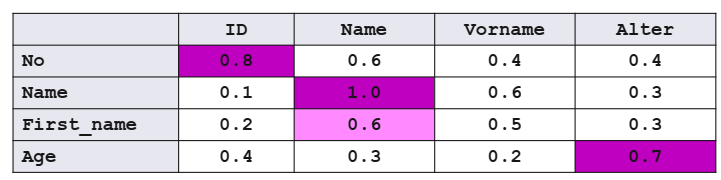




La consideriamo come Similarity Matrix data;
*per me* è più semplice costruirla come tabella: quindi costruiamo la SimTable_Bizer! 

In [36]:
#SA=['ID', 'Name', 'Vorname', 'Alter']
#SB=['No', 'Name', 'First_name', 'Age']

VALORI = [
          ['A', 'B', 'sim'],
          ['ID', 'No', '0.8'],
          ['Name', 'No', '0.6'],
          ['Vorname', 'No', '0.4'],
          ['Alter', 'No', '0.4'],
          ['ID', 'Name', '0.1'],
          ['Name', 'Name', '1.0'],
          ['Vorname', 'Name', '0.6'],
          ['Alter', 'Name', '0.3'],
          ['ID', 'First_name', '0.2'],
          ['Name', 'First_name', '0.6'],
          ['Vorname', 'First_name', '0.5'],
          ['Alter', 'First_name', '0.3'],
          ['ID', 'Age', '0.4'],
          ['Name', 'Age', '0.3'],
          ['Vorname', 'Age', '0.2'],
          ['Alter', 'Age', '0.7'],
         ]
header = VALORI.pop(0)
SimTable_Bizer = pd.DataFrame(VALORI, columns=header)
SimTable_Bizer.head()

,A,B,sim
0,ID,No,0.8
1,Name,No,0.6
2,Vorname,No,0.4
3,Alter,No,0.4
4,ID,Name,0.1


In [37]:
ToSimMatrix(SimTable_Bizer)

,Alter,ID,Name,Vorname
Age,0.7,0.4,0.3,0.2
First_name,0.3,0.2,0.6,0.5
Name,0.3,0.1,1.0,0.6
No,0.4,0.8,0.6,0.4


## 5.2.1 Label-based Schema Matching Methods

Per le funzioni di similarità si utilizza il modulo [**py_stringmatching**](
http://anhaidgroup.github.io/py_stringmatching/v0.4.x/Tutorial.html)
compreso nel sistema [Magellan](https://sites.google.com/site/anhaidgroup/current-projects/magellan), i cui moduli principali che useremo nel corso sono i seguenti:

* **py_entitymatching**: This project seeks to build a Python software package to match entities between two tables using supervised learning. (NOTA : non funziona con Python 3)

* **py_stringsimjoin**: software package that provides scalable implementation of string similarity joins over two tables, for commonly used similarity measures such as Jaccard, Dice, cosine, overlap, overlap coefficient and edit distance.

* **py_stringmatching**: software package that consists of a comprehensive and scalable set of string tokenizers (such as alphabetical tokenizers, whitespace tokenizers) and string similarity measures (such as edit distance, Jaccard, TF/IDF).





In [38]:
!pip install py_stringmatching

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 661 kB 5.1 MB/s 
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055522 sha256=78186e8cb354b7d784a0eb5dab16bfc415421218a32f02c8bc139b4a688d0238
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringmatching


In [39]:
import py_stringmatching as sm

Nel seguito alcuni esempi presi dal 
[Tutorial](https://anhaidgroup.github.io/py_stringmatching/v0.3.x/Tutorial.html)

In [40]:
# create a Levenshtein similarity measure object
lev = sm.Levenshtein()

# input strings
x = 'string matching package'
y = 'string matching library'

# compute Levenshtein distance between x and y
print (lev.get_raw_score(x, y))

# get normalized Levenshtein similarity score between x and y
lev.get_sim_score(x, y)

6


0.7391304347826086

In [41]:
# un minimo di Pre-Processing of Labels
def preprocess_s(s):
      if type(s) is str:
        s = s.lower()
        s = s.replace(',', ' ')
        s = s.replace('&', 'and')
        s = s.replace('_', '')
        s = s.replace('?', '')
        s = s.replace('movie', '') # aggiunta nell'esempio movie
      return s.strip()

In [42]:
# una migliore e più completa funzione di Pre-Processing è nella tesina di Mirco Botti
def string_preprocess(s:str, char:str=string.punctuation, word:list=[]):
    if type(s) is str:
        s = s.lower()
        for c in char:
            s = s.replace(c, " ")
        for w in word:
            s = s.replace(w, " ")
    else:
        s = str(s)
    s = re.sub(" +", " ", s)
    return s.strip()

In [43]:
# definiamo una funzione per il calcolo della Levenshtein similarity
def SimilarityFunction(x):
  return lev.get_sim_score(preprocess_s(x['A']), preprocess_s(x['B']))

# e la usiamo per calcolare la tabella di similarità
def LabelBasedSimilarityTable(TableA,TableB):
  SchemaA=TableA.columns
  SchemaB=TableB.columns
  DA=pd.DataFrame({'A': SchemaA})
  DB=pd.DataFrame({'B': SchemaB})
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop(columns='key')
  PCC.columns=['A','B']
  PCC['sim']=PCC.apply(SimilarityFunction, axis=1)                   
  return PCC

In [44]:
TableA = pd.DataFrame(columns=['ID', 'Name', 'Vorname', 'Alter'])
TableB = pd.DataFrame(columns=['No', 'Name', 'First_name', 'Age'])

LabelBasedSimilarityTable(TableA,TableB)


,A,B,sim
0,ID,No,0.000000
1,ID,Name,0.000000
2,ID,First_name,0.111111
3,ID,Age,0.000000
4,Name,No,0.250000
5,Name,Name,1.000000
6,Name,First_name,0.444444
7,Name,Age,0.500000
8,Vorname,No,0.142857
9,Vorname,Name,0.571429


In [45]:
# una definizione più sintetica è nella tesina di Mirco Botti
def levenshtein_sim(row:pd.Series):
    lev = sm.Levenshtein()
    return lev.get_sim_score(
            string_preprocess(row["A"]),
            string_preprocess(row["B"])
        )

def levenshtein_label_based_similarity(TableA:pd.DataFrame, TableB:pd.DataFrame):
    C = sim_table(TableA, TableB)
    C["sim"] = C.apply(levenshtein_sim, axis=1)
    return C.sort_values("sim", ascending=False)

In [46]:
SimTableLABELmia=LabelBasedSimilarityTable(TableA,TableB)
SimTableLABELsua=levenshtein_label_based_similarity(TableA,TableB)

# effettuiamo il confronto
pd.merge(SimTableLABELsua,SimTableLABELmia,  
         how='outer', indicator=True).query("_merge != 'both' ").sort_values(['B','A'])

pd.merge(SimTableLABELsua,SimTableLABELmia, how='outer',
         indicator=True).query("_merge != 'both' ").sort_values(['A','B'])


,A,B,sim,_merge
11,Alter,First_name,0.100000,left_only
19,Alter,First_name,0.111111,right_only
10,ID,First_name,0.100000,left_only
16,ID,First_name,0.111111,right_only
4,Name,First_name,0.400000,left_only
17,Name,First_name,0.444444,right_only
3,Vorname,First_name,0.500000,left_only
18,Vorname,First_name,0.555556,right_only


In [47]:
ToSimMatrix(SimTableLABELmia)

,Alter,ID,Name,Vorname
Age,0.400000,0.000000,0.500000,0.285714
First_name,0.111111,0.111111,0.444444,0.555556
Name,0.200000,0.000000,1.000000,0.571429
No,0.000000,0.000000,0.250000,0.142857


## 5.2.2 Instance-based Schema Matching Methods : Value Overlap

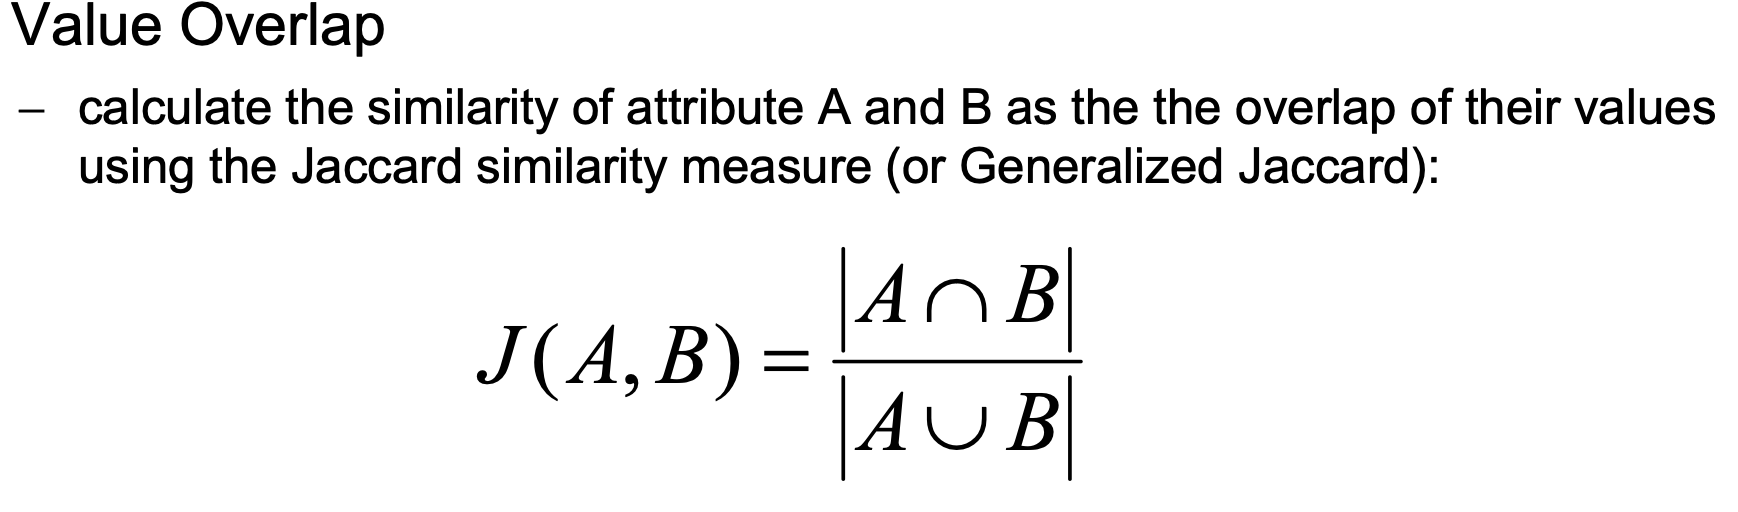

In [48]:
# Consideriamo due semplici dataframe con un solo attributo 
##(stesso nome XYZ nei due dataframe per semplificare)
TableA = pd.DataFrame({'XYZ': ['rossi','verde','franchi']})
TableB = pd.DataFrame({'XYZ': ['rossi','bianchi','verde']})
TableA['XYZ'].values.tolist()

['rossi', 'verde', 'franchi']

### Jaccard

Usiamo la funzione [Jaccard](https://anhaidgroup.github.io/py_stringmatching/v0.3.x/Jaccard.html) presente in py_stringmatching.


In [49]:
j = sm.Jaccard()
j.get_raw_score(TableA['XYZ'].values.tolist(), TableB['XYZ'].values.tolist())

0.5

In [50]:
# è indipendente dai duplicati
TableA = pd.DataFrame({'XYZ': ['rossi','verde','franchi','franchi']})
TableB = pd.DataFrame({'XYZ': ['rossi','bianchi','verde','verde','verde']})
j.get_raw_score(TableA['XYZ'].values.tolist(), TableB['XYZ'].values.tolist())

0.5

In [51]:
# l'intersezione corrisponde al join (merge), l'unione si effettua con concat

In [52]:
pd.merge(TableA,TableB).drop_duplicates()

,XYZ
0,rossi
1,verde


In [53]:
pd.concat([TableA,TableB]).drop_duplicates()

,XYZ
0,rossi
1,verde
2,franchi
1,bianchi


In [54]:
# quindi la jaccard similatity la possiamo ottenere come
len(pd.merge(TableA,TableB).drop_duplicates())/len(pd.concat([TableA,TableB]).drop_duplicates())

0.5

In [55]:
# l'unione si può ottenere come anche outer-join
len(pd.merge(TableA,TableB).drop_duplicates())/len(pd.merge(TableA,TableB, how='outer').drop_duplicates())

0.5

In [56]:
# consideriamo ora due dataset con più colonne, attributi con nome diverso
TableA = pd.DataFrame({'A1': ['rossi','verde','modena'],
                       'A2': ['napoli','modena','napoli']})
TableB = pd.DataFrame({'B1': ['rossi','bianchi','verde'],'B2': ['genova','modena','modena'], })
TableA

,A1,A2
0,rossi,napoli
1,verde,modena
2,modena,napoli


In [57]:
# effettuiamo il calcolo completo, passando come al solito attraverso il prodotto cartesiano PCC
SchemaA=TableA.columns
SchemaB=TableB.columns
DA=pd.DataFrame({'A': SchemaA})
DB=pd.DataFrame({'B': SchemaB})
PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop(columns='key')
PCC.columns=['A','B']
PCC['sim']=np.nan
j = sm.Jaccard()
for index, row in PCC.iterrows():
    PCC.at[index,'sim'] =j.get_raw_score(TableA[row['A']].values.tolist(), TableB[row['B']].values.tolist())
PCC

,A,B,sim
0,A1,B1,0.500000
1,A1,B2,0.250000
2,A2,B1,0.000000
3,A2,B2,0.333333


In [58]:
# riportiamo tutto in una funzione
def ValueOverlapSimilarityTableJaccard(TableA,TableB):
  SchemaA=TableA.columns
  SchemaB=TableB.columns
  DA=pd.DataFrame({'A': SchemaA})
  DB=pd.DataFrame({'B': SchemaB})
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop(columns='key')
  PCC.columns=['A','B']
  PCC['sim']=np.nan
  j = sm.Jaccard()
  for index, row in PCC.iterrows():
    PCC.at[index,'sim'] =j.get_raw_score(TableA[row['A']].values.tolist(), TableB[row['B']].values.tolist())
           
  return PCC.sort_values('sim',ascending=False)

In [59]:
ValueOverlapSimilarityTableJaccard(TableA,TableB)

,A,B,sim
0,A1,B1,0.500000
3,A2,B2,0.333333
1,A1,B2,0.250000
2,A2,B1,0.000000


In [60]:
ToSimMatrix(ValueOverlapSimilarityTableJaccard(TableA,TableB))

,A1,A2
B1,0.50,0.000000
B2,0.25,0.333333


In [61]:
# anche per questo caso nella tesina di Mirco Botti c'è una definizione migliore e più sintetica
def jaccard_sim(row:pd.Series, TableA:pd.DataFrame,TableB:pd.DataFrame):
    j = sm.Jaccard()
    return j.get_raw_score(
            TableA[row["A"]].apply(string_preprocess).tolist(),
            TableB[row["B"]].apply(string_preprocess).tolist()
        )

def jaccard_value_overlap_sim(TableA:pd.DataFrame, TableB:pd.DataFrame):
    C = sim_table(TableA, TableB)
    C["sim"] = C.apply(jaccard_sim, args=(TableA, TableB), axis=1)
    return C.sort_values("sim", ascending=False)


In [62]:
# nella jaccard il confronto dei valori avviene in base alla uguaglianza, quindi  rossi è diverso da rosi

j = sm.Jaccard()
j.get_raw_score(['rossi','verde'], 
                ['rosi','verde'])

0.3333333333333333

In [63]:
# pertanto in dataset reali l'overlap similarity calcolata in questo modo è poco significativa
TableA = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/rotten_tomatoes.csv')
TableB = pd.read_csv('http://pages.cs.wisc.edu/~anhai/data/784_data/movies1/csv_files/imdb.csv')

SimTableOverlap=jaccard_value_overlap_sim(TableA,TableB)
# nota: può richiedere alcuni minuti ...

In [64]:
SimTableOverlap.sort_values('sim', ascending=False)

,A,B,sim
14,Name,Name,0.396175
56,Director,Director,0.288263
13,Name,Id,0.171611
70,Creator,Creator,0.108326
57,Director,Creator,0.062706
...,...,...,...
184,Genre,YearRange,0.000000
185,Genre,ReleaseDate,0.000000
186,Genre,Director,0.000000
130,Duration,Id,0.000000


In [65]:
# Occorre considerare un confronto approssimato in base al quale rossi e rosi
# risultino uguali, invece dell'uguaglianza possiamo usare 
# la Levenshtein similarity con una certa soglia

lev = sm.Levenshtein()
lev.get_sim_score('rossi', 'rosi')

# quindi se consideriamo uguali quelli > 0.7  'rossi', 'rosi' corrispondono 

0.8

Nella prossima lezione approfondiremo questo problema considerando
sia la  *Generalized*  che la *Extended* Jaccard; inoltre verrà introdotto il concetto di similarity join per un calcolo efficiente della similarità tra enormi insiemi di stringhe. 
 


## Utilizzo di altre similarity functions

**py_stringmatching** fornisce molte altre  funzioni di similarità 
http://anhaidgroup.github.io/py_stringmatching/v0.4.x/Tutorial.html

ad esempio la [Jaro](http://anhaidgroup.github.io/py_stringmatching/v0.4.x/Jaro.html)


In [66]:
def SimilarityFunction(x):
  jaro = sm.Jaro()
  return jaro.get_sim_score(preprocess_s(x['A']), preprocess_s(x['B']))

def LabelBasedSimilarityTable(TableA,TableB):
  SchemaA=TableA.columns
  SchemaB=TableB.columns
  DA=pd.DataFrame({'A': SchemaA})
  DB=pd.DataFrame({'B': SchemaB})
  PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop(columns='key')
  PCC.columns=['A','B']
  PCC['sim']=PCC.apply(SimilarityFunction, axis=1)                   
  return PCC

LabelBasedSimilarityTable(TableA,TableB)

,A,B,sim
0,Id,Id,1.000000
1,Id,Name,0.000000
2,Id,YearRange,0.000000
3,Id,ReleaseDate,0.000000
4,Id,Director,0.583333
...,...,...,...
216,Description,RatingValue,0.454545
217,Description,ContentRating,0.502331
218,Description,Genre,0.527273
219,Description,Url,0.474747


## 5.2.4 Combined Approaches

**Hybrid Approaches**
* integrate different clues into single similarity function

**Ensembles**
* apply different base matchers and then combine their results

In [67]:
# Consideriamo gli schemi dell'esempio slide
SchemaA=['ID', 'Name', 'Vorname', 'Alter']
SchemaB=['No', 'Name', 'First_name', 'Age']

# per effettuare il metodo Value Overlap, consideriamo delle istanze
VALORI = [
          [1,'Rossi', 'Paolo', '55'],
          [2,'Smith', 'Adna', '40'],
          [3,'Paolo', 'Cris', '76'],
          [4, 'Otto', 'Felix', '50'],
          [5, 'Otto', 'Adna', '50'],
         ]
TableA = pd.DataFrame(VALORI, columns=SchemaA)


VALORI = [
          [100,'Rossi', 'Paolo', '55'],
          [101,'Smith', 'Luigi', '40'],
          [103, 'Otto', 'Felix', '55'],
          [104, 'Verde', 'Anna', '50'],
         ]
TableB = pd.DataFrame(VALORI, columns=SchemaB)


In [68]:
# consideriamo come data la SimTable_Bizer

VALORI = [
          ['A', 'B', 'sim'],
          ['ID', 'No', '0.8'],
          ['Name', 'No', '0.6'],
          ['Vorname', 'No', '0.4'],
          ['Alter', 'No', '0.4'],
          ['ID', 'Name', '0.1'],
          ['Name', 'Name', '1.0'],
          ['Vorname', 'Name', '0.6'],
          ['Alter', 'Name', '0.3'],
          ['ID', 'First_name', '0.2'],
          ['Name', 'First_name', '0.6'],
          ['Vorname', 'First_name', '0.5'],
          ['Alter', 'First_name', '0.3'],
          ['ID', 'Age', '0.4'],
          ['Name', 'Age', '0.3'],
          ['Vorname', 'Age', '0.2'],
          ['Alter', 'Age', '0.7'],
         ]
header = VALORI.pop(0)
SimTable_Bizer = pd.DataFrame(VALORI, columns=header)
ToSimMatrix(SimTable_Bizer)
SimTable_Bizer

,A,B,sim
0,ID,No,0.8
1,Name,No,0.6
2,Vorname,No,0.4
3,Alter,No,0.4
4,ID,Name,0.1
5,Name,Name,1.0
6,Vorname,Name,0.6
7,Alter,Name,0.3
8,ID,First_name,0.2
9,Name,First_name,0.6


In [69]:
# consideriamo la SimTableLABEL
SimTableLABEL=LabelBasedSimilarityTable(TableA,TableB)
ToSimMatrix(SimTableLABEL)

,Alter,ID,Name,Vorname
Age,0.688889,0.000000,0.722222,0.000000
First_name,0.374074,0.537037,0.000000,0.756614
Name,0.633333,0.000000,1.000000,0.000000
No,0.000000,0.000000,0.583333,0.547619


In [70]:
# consideriamo la SimTableOVERLAP
SimTableOVERLAP=ValueOverlapSimilarityTableJaccard(TableA,TableB)
ToSimMatrix(SimTableOVERLAP)

,Alter,ID,Name,Vorname
Age,0.75,0.0,0.000000,0.000000
First_name,0.00,0.0,0.142857,0.333333
Name,0.00,0.0,0.600000,0.000000
No,0.00,0.0,0.000000,0.000000


## Hybrid Approaches

Per l'Hybrid Approaches supponiamo di voler prendere il 50% della similarità LABEL ed il 25% ci ciascuna delle altre due

In [71]:
X=pd.merge(SimTable_Bizer,SimTableOVERLAP, on=['A','B'])
X=X.rename(columns={"sim_x": "SimBizer", "sim_y": "SimOVERLAP"})
X

,A,B,SimBizer,SimOVERLAP
0,ID,No,0.8,0.000000
1,Name,No,0.6,0.000000
2,Vorname,No,0.4,0.000000
3,Alter,No,0.4,0.000000
4,ID,Name,0.1,0.000000
5,Name,Name,1.0,0.600000
6,Vorname,Name,0.6,0.000000
7,Alter,Name,0.3,0.000000
8,ID,First_name,0.2,0.000000
9,Name,First_name,0.6,0.142857


In [72]:
X=pd.merge(SimTableLABEL,X, on=['A','B'])
X=X.rename(columns={"sim": "SimLABEL"})
X

,A,B,SimLABEL,SimBizer,SimOVERLAP
0,ID,No,0.000000,0.8,0.000000
1,ID,Name,0.000000,0.1,0.000000
2,ID,First_name,0.537037,0.2,0.000000
3,ID,Age,0.000000,0.4,0.000000
4,Name,No,0.583333,0.6,0.000000
5,Name,Name,1.000000,1.0,0.600000
6,Name,First_name,0.000000,0.6,0.142857
7,Name,Age,0.722222,0.3,0.000000
8,Vorname,No,0.547619,0.4,0.000000
9,Vorname,Name,0.000000,0.6,0.000000


In [73]:
# casting in float delle sim
for a in ['SimLABEL',	'SimBizer',	'SimOVERLAP']:
  X[a]=X[a].astype(float)


In [74]:
X['sim_HYBRID']=0.5*X['SimLABEL']+0.25*X['SimBizer']+0.25*X['SimOVERLAP']
X

,A,B,SimLABEL,SimBizer,SimOVERLAP,sim_HYBRID
0,ID,No,0.000000,0.8,0.000000,0.200000
1,ID,Name,0.000000,0.1,0.000000,0.025000
2,ID,First_name,0.537037,0.2,0.000000,0.318519
3,ID,Age,0.000000,0.4,0.000000,0.100000
4,Name,No,0.583333,0.6,0.000000,0.441667
5,Name,Name,1.000000,1.0,0.600000,0.900000
6,Name,First_name,0.000000,0.6,0.142857,0.185714
7,Name,Age,0.722222,0.3,0.000000,0.436111
8,Vorname,No,0.547619,0.4,0.000000,0.373810
9,Vorname,Name,0.000000,0.6,0.000000,0.150000


## Ensembles: How to Combine the Predictions of Multiple Matchers?

Simple approaches: Use avg(), min(), or max() function


In [75]:
X['MaxSim']=X[['SimLABEL',	'SimBizer',	'SimOVERLAP']].max(axis=1)
X['MinSim']=X[['SimLABEL',	'SimBizer',	'SimOVERLAP']].min(axis=1)
X['AvgSim']=X[['SimLABEL',	'SimBizer',	'SimOVERLAP']].mean(axis=1)
X

,A,B,SimLABEL,SimBizer,SimOVERLAP,sim_HYBRID,MaxSim,MinSim,AvgSim
0,ID,No,0.000000,0.8,0.000000,0.200000,0.800000,0.000000,0.266667
1,ID,Name,0.000000,0.1,0.000000,0.025000,0.100000,0.000000,0.033333
2,ID,First_name,0.537037,0.2,0.000000,0.318519,0.537037,0.000000,0.245679
3,ID,Age,0.000000,0.4,0.000000,0.100000,0.400000,0.000000,0.133333
4,Name,No,0.583333,0.6,0.000000,0.441667,0.600000,0.000000,0.394444
5,Name,Name,1.000000,1.0,0.600000,0.900000,1.000000,0.600000,0.866667
6,Name,First_name,0.000000,0.6,0.142857,0.185714,0.600000,0.000000,0.247619
7,Name,Age,0.722222,0.3,0.000000,0.436111,0.722222,0.000000,0.340741
8,Vorname,No,0.547619,0.4,0.000000,0.373810,0.547619,0.000000,0.315873
9,Vorname,Name,0.000000,0.6,0.000000,0.150000,0.600000,0.000000,0.200000


# **5.3** Generating Correspondences from the Similarity Table

**Input**: Similarity Table containing attribute similarities  
**Output**: Set of correspondences 

L'insieme delle corrispondenze le indicheremo con **Match Table**



## Local Single Attribute Strategies

Come esempio useremo per semplicità (e per avere riscontro con le slide)
la SimTable_Bizer


### 1. Thresholding 

In [76]:
def Thresholding(MT,soglia):
  return MT[MT.sim>soglia]

In [77]:
SimTable_Bizer['sim']=SimTable_Bizer['sim'].astype(float)
Thresholding(SimTable_Bizer,0.49)

,A,B,sim
0,ID,No,0.8
1,Name,No,0.6
5,Name,Name,1.0
6,Vorname,Name,0.6
9,Name,First_name,0.6
10,Vorname,First_name,0.5
15,Alter,Age,0.7


In [78]:
ToSimMatrix(Thresholding(SimTable_Bizer,0.49))

,Alter,ID,Name,Vorname
Age,0.7,NaN,NaN,NaN
First_name,NaN,NaN,0.6,0.5
Name,NaN,NaN,1.0,0.6
No,NaN,0.8,0.6,NaN


### TopK e Top1

Consideriamo la seconda strategia, quella di individuare per ogni attributo di A (B) i TopK attributi di B (A).

Nota che topK deve avere una direzione altrimenti se prendi  primi k per A
questi possono non essere i primi K anche per B

In [79]:
SimTable_Bizer

,A,B,sim
0,ID,No,0.8
1,Name,No,0.6
2,Vorname,No,0.4
3,Alter,No,0.4
4,ID,Name,0.1
5,Name,Name,1.0
6,Vorname,Name,0.6
7,Alter,Name,0.3
8,ID,First_name,0.2
9,Name,First_name,0.6


### ***==>*** cumcount

Vedi la sezione "Come ottenere una POSIZIONE : cumcount" del file 2020_Pandas_Join_Merge.ipynb

Cumcount è un operatore particolare, **completamente differente** dagli
operatori di aggregazione (mean, max, sum, count, nunique, ...). 

La logica del groupby è semplice: si formano dei gruppi di righe con gli stessi valori dell'attributo (o attributi) di raggruppamento (ad esempio un group by su Citta firma gruppi con la stessa città)  

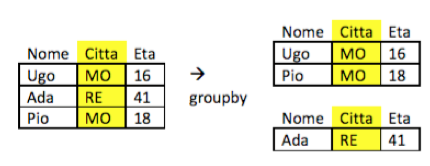




Se dopo il group by applico un operatore di aggregazione, ad esempio la media mean(), tale operatore agisce su ogni gruppo e quindi restituisce un valore per ogni gruppo ottenendo così una   statistica aggregate appunto per categoria: nel nostro esempio la media per ogni Città: 
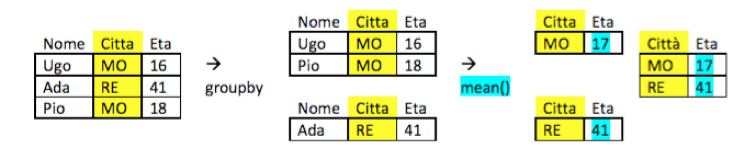

L'operatore cumcount() **non è un operatore di aggregazione**: 
applicato al groupby restituisce la posizione del record nel gruppo 

Pertanto se si ordina il dataframe rispetto ad un certo attributo (età) , si raggruppa rispetto ad un altro attributo (Città), si ottengono per ogni citta i record con la posizione rispetto ad età: 0 il più giovane ...
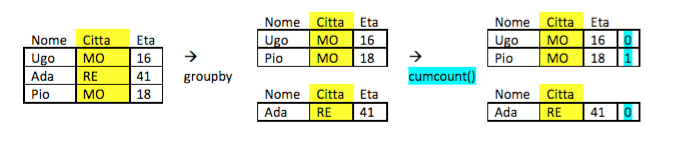





In [80]:
# nel seguito cerchiamo di riassumere applicandola
SimTable_Bizer.head()

,A,B,sim
0,ID,No,0.8
1,Name,No,0.6
2,Vorname,No,0.4
3,Alter,No,0.4
4,ID,Name,0.1


In [81]:
SimTable_Bizer.sort_values(['sim'], ascending=[False])

,A,B,sim
5,Name,Name,1.0
0,ID,No,0.8
15,Alter,Age,0.7
1,Name,No,0.6
6,Vorname,Name,0.6
9,Name,First_name,0.6
10,Vorname,First_name,0.5
2,Vorname,No,0.4
3,Alter,No,0.4
12,ID,Age,0.4


In [82]:
SimTable_Bizer.sort_values(['sim'], ascending=[False]).groupby('A').cumcount() + 1

5     1
0     1
15    1
1     2
6     1
9     3
10    2
2     3
3     2
12    2
7     3
11    4
13    4
8     3
14    4
4     4
dtype: int64

In [83]:
SimTable_Bizer['Posizione']=SimTable_Bizer.sort_values(['sim'], ascending=[False]).groupby('A').cumcount() + 1
SimTable_Bizer.sort_values(['A','Posizione'])

,A,B,sim,Posizione
15,Alter,Age,0.7,1
3,Alter,No,0.4,2
7,Alter,Name,0.3,3
11,Alter,First_name,0.3,4
0,ID,No,0.8,1
12,ID,Age,0.4,2
8,ID,First_name,0.2,3
4,ID,Name,0.1,4
5,Name,Name,1.0,1
1,Name,No,0.6,2


In [84]:
# per prendere i migliori 2 per A
SimTable_Bizer[SimTable_Bizer.Posizione<=2].sort_values(['A','Posizione'])

,A,B,sim,Posizione
15,Alter,Age,0.7,1
3,Alter,No,0.4,2
0,ID,No,0.8,1
12,ID,Age,0.4,2
5,Name,Name,1.0,1
1,Name,No,0.6,2
6,Vorname,Name,0.6,1
10,Vorname,First_name,0.5,2


In [85]:
# elimiamo la colonna Posizione
SimTable_Bizer=SimTable_Bizer.drop(columns='Posizione')

In [86]:
def TopK(MT,K,AoB):
  CMT=deepcopy(MT)
  

  CMT['POSIZIONE'] = CMT.sort_values(['sim'], ascending=[False]) \
             .groupby([AoB]) \
             .cumcount() + 1

  return CMT[(CMT.POSIZIONE<=K)].drop(columns='POSIZIONE')

In [87]:
# Top2 per A : per ogni attributo dello schema A i migliori due attributi corrispondenti 
TopK(SimTable_Bizer,2,'A').sort_values(['A','sim'], ascending=[True,False])

,A,B,sim
15,Alter,Age,0.7
3,Alter,No,0.4
0,ID,No,0.8
12,ID,Age,0.4
5,Name,Name,1.0
1,Name,No,0.6
6,Vorname,Name,0.6
10,Vorname,First_name,0.5


In [88]:
# Top2 per B : per ogni attributo dello schema B i migliori due attributi corrispondenti 
TopK(SimTable_Bizer,2,'B').sort_values(['B','sim'], ascending=[True,False])

,A,B,sim
15,Alter,Age,0.7
12,ID,Age,0.4
9,Name,First_name,0.6
10,Vorname,First_name,0.5
5,Name,Name,1.0
6,Vorname,Name,0.6
0,ID,No,0.8
1,Name,No,0.6


Finalmente possiamo "scoprire" il significato delle celle viola
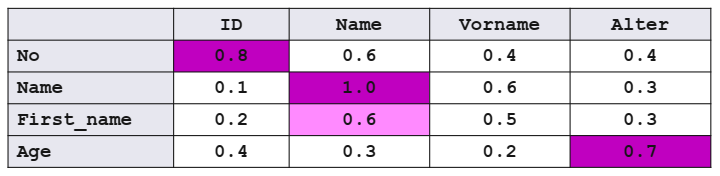

In [89]:
# Top1 per B : per ogni attributo dello schema B il migliore 
TopK(SimTable_Bizer,1,'A')[['A','B','sim']]


,A,B,sim
0,ID,No,0.8
5,Name,Name,1.0
6,Vorname,Name,0.6
15,Alter,Age,0.7


## Global Matching 



### Simmetric Best Match (SBM)

Attenzione : non è il Top1 (come erroneamente riportato in alcuni vecchi notebook)

Il Simmetric Best Match è una strategia Global Mapping in quanto assicura un mapping (insieme di corrispondenze) di tipo 1-1.

E' tra tutte le strategie di Global Mapping quella più restrittiva, ovvero con un più piccolo insieme di corrispondenze:

L'idea di base è che per ogni attributo X viene accettato solo l'attributo Y meglio corrispondente dell'altra fonte: una coppia (X,Y) viene restituita se Y è il miglior  corrispondente per X, e viceversa.

In [90]:
def SBM(MT):
  CMT=deepcopy(MT)
  # l'attributo Posizione è qui chiamato RowNo

  CMT['A_RowNo'] = CMT.sort_values(['sim'], ascending=[False]) \
             .groupby(['A']) \
             .cumcount() + 1

  CMT['B_RowNo'] = CMT.sort_values(['sim'], ascending=[False]) \
             .groupby(['B']) \
             .cumcount() + 1

  return CMT[(CMT.A_RowNo==1) & (CMT.B_RowNo==1)].drop(columns=['A_RowNo', 'B_RowNo']).sort_values(['sim'], ascending=[False])
SBM(SimTable_Bizer)

,A,B,sim
5,Name,Name,1.0
0,ID,No,0.8
15,Alter,Age,0.7


### Maximum Weight 

https://stackoverflow.com/questions/50908267/solving-a-maximum-weight-bipartite-b-matching#targetText=Bipartite%20matching%20problems%20pair%20two,MWM%20is%20the%20Hungarian%20algorithm


http://www.optimization-online.org/DB_FILE/2011/09/3178.pdf




In [91]:
!pip install pulp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 5.2 MB/s 


In [92]:
import networkx as nx
from pulp import *

In [93]:
def solve_wbm(from_nodes, to_nodes, wt):

    prob = LpProblem("WBM Problem", LpMaximize)

    # Create The Decision variables
    choices = LpVariable.dicts("e",(from_nodes, to_nodes), 0, 1, LpInteger)

    # Add the objective function 
    prob += lpSum([wt[u][v] * choices[u][v] 
                   for u in from_nodes
                   for v in to_nodes]), "Total weights of selected edges"


    # Constraint set ensuring that the total from/to each node 
    # is less than its capacity
    for u in from_nodes:
        for v in to_nodes:
#            prob += lpSum([choices[u][v] for v in to_nodes]) <= ucap[u], ""
#            prob += lpSum([choices[u][v] for u in from_nodes]) <= vcap[v], ""
            prob += lpSum([choices[u][v] for v in to_nodes]) <= 1, ""
            prob += lpSum([choices[u][v] for u in from_nodes]) <= 1, ""


    # The problem data is written to an .lp file
    prob.writeLP("WBM.lp")

    # The problem is solved using PuLP's choice of Solver
    prob.solve()

    # The status of the solution is printed to the screen
    print( "Status:", LpStatus[prob.status])
    return(prob)


def print_solution(prob):
    # Each of the variables is printed with it's resolved optimum value
    for v in prob.variables():
        if v.varValue > 1e-3:
            print(f'{v.name} = {v.varValue}')
    print(f"Sum of wts of selected edges = {round(value(prob.objective), 4)}")

def print_solution2(prob):
    # Each of the variables is printed with it's resolved optimum value
    for v in prob.variables():
        if v.varValue > 1e-3:
            print(f'{v.name} = {v.varValue}')
    print(f"Sum of wts of selected edges = {round(value(prob.objective), 4)}")


def get_selected_edges(prob):

    selected_from = [v.name.split("_")[1] for v in prob.variables() if v.value() > 1e-3]
    selected_to   = [v.name.split("_")[2] for v in prob.variables() if v.value() > 1e-3]

    selected_edges = []
    for su, sv in list(zip(selected_from, selected_to)):
        selected_edges.append((su, sv))
    return(selected_edges)

#just a convenience function to generate a dict of dicts
def create_wt_doubledict(from_nodes, to_nodes,wts):

    wt = {}
    for u in from_nodes:
        wt[u] = {}
        for v in to_nodes:
            wt[u][v] = 0

    for k,val in wts.items():
        u,v = k[0], k[1]
        wt[u][v] = val
    return(wt)

In [94]:
MT = pd.DataFrame(columns=['l_id', 'r_id', '_sim_score'])
MT=MT.append({'l_id': 'A', 'r_id':'C', '_sim_score' : 1.0}, ignore_index=True )
MT=MT.append({'l_id': 'A', 'r_id':'D', '_sim_score' : 0.8}, ignore_index=True )
MT=MT.append({'l_id': 'B', 'r_id':'C', '_sim_score' : 0.9}, ignore_index=True )
MT=MT.append({'l_id': 'B', 'r_id':'D', '_sim_score' : 0.6}, ignore_index=True )

from_nodes=MT.l_id.unique().tolist()
to_nodes=MT.r_id.unique().tolist()

wts = {}
for index, row in MT.iterrows():
    wts[row['l_id'],row['r_id']]=row['_sim_score']
wts

wt = create_wt_doubledict(from_nodes, to_nodes,wts)
wt
p = solve_wbm(from_nodes, to_nodes, wt)
print_solution(p)

Status: Optimal
e_A_D = 1.0
e_B_C = 1.0
Sum of wts of selected edges = 1.7


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [95]:
wts

{('A', 'C'): 1.0, ('A', 'D'): 0.8, ('B', 'C'): 0.9, ('B', 'D'): 0.6}

In [96]:
from_nodes = ToSimMatrix(SimTable_Bizer).index.tolist()
to_nodes = ToSimMatrix(SimTable_Bizer).columns.tolist()
WT = ToSimMatrix(SimTable_Bizer).to_dict(orient='index')
WT

{'Age': {'Alter': 0.7, 'ID': 0.4, 'Name': 0.3, 'Vorname': 0.2},
 'First_name': {'Alter': 0.3, 'ID': 0.2, 'Name': 0.6, 'Vorname': 0.5},
 'Name': {'Alter': 0.3, 'ID': 0.1, 'Name': 1.0, 'Vorname': 0.6},
 'No': {'Alter': 0.4, 'ID': 0.8, 'Name': 0.6, 'Vorname': 0.4}}

In [97]:
wts = {}
for x in WT:
  for y in WT[x]: 
    wts[x,y]=float(WT[x][y])
wts

{('Age', 'Alter'): 0.7,
 ('Age', 'ID'): 0.4,
 ('Age', 'Name'): 0.3,
 ('Age', 'Vorname'): 0.2,
 ('First_name', 'Alter'): 0.3,
 ('First_name', 'ID'): 0.2,
 ('First_name', 'Name'): 0.6,
 ('First_name', 'Vorname'): 0.5,
 ('Name', 'Alter'): 0.3,
 ('Name', 'ID'): 0.1,
 ('Name', 'Name'): 1.0,
 ('Name', 'Vorname'): 0.6,
 ('No', 'Alter'): 0.4,
 ('No', 'ID'): 0.8,
 ('No', 'Name'): 0.6,
 ('No', 'Vorname'): 0.4}

In [98]:
wt = create_wt_doubledict(from_nodes, to_nodes,wts)
p = solve_wbm(from_nodes, to_nodes, wt)
print_solution(p)


Status: Optimal
e_Age_Alter = 1.0
e_First_name_Vorname = 1.0
e_Name_Name = 1.0
e_No_ID = 1.0
Sum of wts of selected edges = 3.0


In [99]:
ToSimMatrix(SimTable_Bizer)

,Alter,ID,Name,Vorname
Age,0.7,0.4,0.3,0.2
First_name,0.3,0.2,0.6,0.5
Name,0.3,0.1,1.0,0.6
No,0.4,0.8,0.6,0.4



Nota: occorrerebbe riportare il risultato in un dataframe per confrontarlo poi con gli altri! Però nei nostri esercizi non applicheremo questa tecnica.

### Stable Marriage

Stable Marriage per similarità simmetriche (è quello delle dispense)

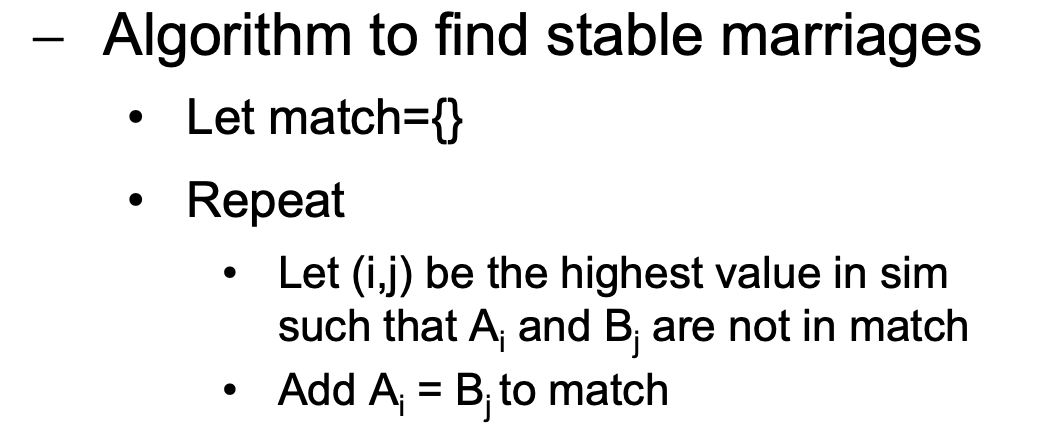

Si realizza questo  algoritmo in una funzione StableMarriage
Si deve ordinare su sim; Si potrebbe mostrare il fatto che è non deterministico, facendone due versioni, una che ordina anche su A ASC e una che ordina su A DESC

In [100]:
SA1=['attA', 'attB']
SB1=['attC', 'attD']

VALORI = [
          ['A', 'B', 'sim'],
          ['attA', 'attC', 1.0],
          ['attA', 'attD', 0.8],
          ['attB', 'attC', 0.9],
          ['attB', 'attD', 0.6],
         ]
header = VALORI.pop(0)
SimTable1 = pd.DataFrame(VALORI, columns=header)
SimTable1


,A,B,sim
0,attA,attC,1.0
1,attA,attD,0.8
2,attB,attC,0.9
3,attB,attD,0.6


In [101]:

'''
Let match={}
• Repeat
• Let (i,j) be the highest value in sim
such that Ai and Bj are not in match
• Add Ai = Bj to match
'''

def StableMarriage(MatchTable):
  MATCH = pd.DataFrame(columns=['A', 'B','sim'])
  MT=deepcopy(MatchTable)
  MT=MT.sort_values(['sim'], ascending=[False])
  while True:
    R=MT.loc[(~MT['A'].isin(MATCH['A'])) & (~MT['B'].isin(MATCH['B']))]
    if len(R)==0:
      break
    x=R.iloc[0,:]
    MATCH=MATCH.append(x, ignore_index=True)
  return MATCH

In [102]:
StableMarriage(SimTable_Bizer)

,A,B,sim
0,Name,Name,1.0
1,ID,No,0.8
2,Alter,Age,0.7
3,Vorname,First_name,0.5


### Stable Marriage : Algoritmo generale

Algoritmo Generale nel senso che considera *similarità non simmetricheé,  (funziona ovviamente anche per similarità simmetriche)

(dalle [slide originali](https://www.slideserve.com/isanne/informationsintegration-schema-matching-powerpoint-ppt-presentation) di Felix Naumann, implementato in python dal [Prof. Mauro Leoncini](https://personale.unimore.it/rubrica/dettaglio/leoncini))

In [103]:
# stable marriage
def matchmaker(prefA,prefB,verbose=True):
    '''Algoritmo di stable matching. Le preferenze sono date usando normali dizionari Python.'''
    from copy import deepcopy
    afree = sorted(prefA.keys())
    paired  = {}
    prefA2 = deepcopy(prefA)
    prefB2 = deepcopy(prefB)
    while afree:
        a = afree.pop(0)
        Alist = prefA2[a]
        b = Alist.pop(0)
        withb = paired.get(b)
        if not withb:
            # b non è ancora accoppiato
            paired[b] = a
            if verbose:
                print("  %s e %s" % (a, b))
        else:
            # a ha cercato di fare coppia con b, che però era già accoppiato
            Blist = prefB2[b]
            if Blist.index(withb) > Blist.index(a):
                # b considera a un partner migliore
                paired[b] = a
                if verbose:
                    print("  %s lascia %s per %s" % (b, withb, a))
                if prefA2[withb]:
                    # chi è stato lasciato ha ancora altri possibili partner
                    afree.append(withb)
            else:
                # b tiene il partner attuale
                if Alist:
                    # a dovrà continuare a cercare
                    afree.append(a)
    return paired

In [104]:
# Per testare l'algoritmo
Uomini = { '1': ['B', 'D', 'A', 'C'],
          '2': ['C', 'A', 'D', 'B'],
          '3': ['B', 'C', 'A', 'D'],
          '4': ['D', 'A', 'C', 'B']}

Donne = { 'A': ['2', '1', '4', '3'],
         'B': ['4', '3', '1', '2'],
         'C': ['1', '4', '3', '2'],
         'D': ['2', '1', '4', '3']
}

pairing = matchmaker(Uomini,Donne,verbose=True)
pairing

  1 e B
  2 e C
  B lascia 1 per 3
  4 e D
  D lascia 4 per 1
  4 e A


{'B': '3', 'C': '2', 'D': '1', 'A': '4'}

La seguente funzione invece controlla se un dato matching è stabile


In [105]:
def check(paired, prefA, prefB, verbose=True):
    '''Algoritmo per controllare se un matching è stabile'''
    inversepaired = dict((v,k) for k,v in paired.items())
    for B,A in paired.items():
        B_pref = prefB[B]
        B_better = B_pref[:B_pref.index(A)] # se a è nella lista B_better, allora B lo preferisce al partner A del matching
        A_pref = prefA[A]
        A_better = A_pref[:A_pref.index(B)] # se b è nella lista A_better, allora A lo preferisce al partner B del matching
        for a in B_better:
            b = inversepaired[a] # b è il partner attuale di a 
            a_pref = prefA[a]    # a_pref è la lista di preferenze di a
            if a_pref.index(b) > a_pref.index(B):
                if verbose:
                    print("%s e %s si preferiscono ai loro partner attuali %s e %s nel matching, che quindi non è stabile."
                          % (B, a, A, b))
                return False
        for b in A_better:
            a = paired[b]
            b_pref = prefB[b]
            if b_pref.index(a) > b_pref.index(A):
                if verbose:
                    print("%s e %s si preferiscono ai loro partner attuali %s e %s nel matching, che quindi non è stabile."
                          % (A, b, B, a))
                return False
    if verbose:
        print("Il matching è stabile")
    return True

Per testare questa funzione, mostriamo come il seguente matching nell'esempio delle slide non sia stabile
```
A C 1
B C 0.9
A D 0.8
B D 0.6
```



In [106]:
Uomini = { 'A': ['C', 'D'],
           'B': ['C', 'D']}

Donne = { 'C': ['A', 'B'],
          'D': ['A', 'B'] 
}

Accoppiamento= {'D': 'A', 'C': 'B'}

check(Accoppiamento,Uomini,Donne,verbose=True)


A e C si preferiscono ai loro partner attuali D e B nel matching, che quindi non è stabile.


False

#### Esempio caso di similarità non simmetrico
Caso NON Simmetrico: per ogni coppia devi dare sia la sim(A,B) che sim(B,A),
quindi vengono usate due MAtchTable, MT_AB e MT_BA, rappresentate 
con due dataframe della stessa lunghezza.

In [107]:

MT_AB = pd.DataFrame(columns=['A', 'B', 'sim'])
MT_BA = pd.DataFrame(columns=['A', 'B', 'sim'])

MT_AB=MT_AB.append({'A': 'l1', 'B':'r1', 'sim' : 0.9}, ignore_index=True )
MT_BA=MT_BA.append({'A': 'r1', 'B':'l1', 'sim' : 0.6}, ignore_index=True )

MT_AB=MT_AB.append({'A': 'l1', 'B':'r2', 'sim' : 0.85}, ignore_index=True )
MT_BA=MT_BA.append({'A': 'r2', 'B':'l1', 'sim' : 0.85}, ignore_index=True )

MT_AB=MT_AB.append({'A': 'l2', 'B':'r1', 'sim' : 0.75}, ignore_index=True )
MT_BA=MT_BA.append({'A': 'r1', 'B':'l2', 'sim' : 0.75}, ignore_index=True )

MT_AB=MT_AB.append({'A': 'l2', 'B':'r3', 'sim' : 0.69}, ignore_index=True )
MT_BA=MT_BA.append({'A': 'r3', 'B':'l2', 'sim' : 0.69}, ignore_index=True )

print(MT_AB)
print(MT_BA)


    A   B   sim
0  l1  r1  0.90
1  l1  r2  0.85
2  l2  r1  0.75
3  l2  r3  0.69
    A   B   sim
0  r1  l1  0.60
1  r2  l1  0.85
2  r1  l2  0.75
3  r3  l2  0.69


In [108]:
def StableMarriage_NonSimmetrico(MatchTableAB,MatchTableBA):
    dfDL=MatchTableAB[['A','B','sim']]
    hA=MatchTableAB['A'].values.tolist()
    prefA = {}
    i = 0
    for idx in hA:
        prefA[idx] = [y for (y) in dfDL[dfDL['A']==idx].sort_values('sim', ascending=False)['B'] ]
        i += 1
    print(prefA)
    dfDL=MatchTableBA[['A','B','sim']]
    hB=MatchTableBA['A'].values.tolist()
    prefB = {}
    i = 0
    for idx in hB:
        prefB[idx] = [y for (y) in dfDL[dfDL['A']==idx].sort_values('sim', ascending=False)['B'] ]
        i += 1
    print(prefB)
    pairing = matchmaker(prefA,prefB,verbose=False)
    MatchTable11SM = pd.DataFrame(list(pairing.items()))
    MatchTable11SM.columns = ['B', 'A']
    MatchTable11SM=MatchTable11SM[['A', 'B']]
    return MatchTable11SM
StableMarriage_NonSimmetrico(MT_AB,MT_BA)


{'l1': ['r1', 'r2'], 'l2': ['r1', 'r3']}
{'r1': ['l2', 'l1'], 'r2': ['l1'], 'r3': ['l2']}


,A,B
0,l2,r1
1,l1,r2


#### Esempio caso di similarità  simmetrico

E' la situazione classica dove per ogni coppia devi dare solo sim(A,B) in quanto sim(B,A) è uguale e quindi viene usata una sola MatchTable


In [109]:
MT = pd.DataFrame(columns=['A', 'B', 'sim'])
MT=MT.append({'A': 'l1', 'B':'r1', 'sim' : 0.9}, ignore_index=True )
MT=MT.append({'A': 'l1', 'B':'r2', 'sim' : 0.85}, ignore_index=True )
MT=MT.append({'A': 'l2', 'B':'r1', 'sim' : 0.75}, ignore_index=True )
MT=MT.append({'A': 'l2', 'B':'r3', 'sim' : 0.69}, ignore_index=True )
MT

,A,B,sim
0,l1,r1,0.90
1,l1,r2,0.85
2,l2,r1,0.75
3,l2,r3,0.69


# Riassunto funzioni utilizzate

## to_sim_table e to_sim_matrix

In [110]:
def sim_table(TableA:pd.DataFrame, TableB:pd.DataFrame):
    A = pd.DataFrame({"A": TableA.columns})
    B = pd.DataFrame({"B": TableB.columns})
    S = A.assign(key=1).merge(B.assign(key=1), on="key").drop("key", axis=1)
    return S
    
def random_sim_table(TableA:pd.DataFrame, TableB:pd.DataFrame):
    S = sim_table(TableA, TableB)
    S["sim"] = np.random.rand(len(S))
    return S


def to_sim_table(SimMatrix:pd.DataFrame):
    return SimMatrix.stack().reset_index(name="sim")

def to_sim_matrix(SimTable:pd.DataFrame):
    return SimTable.pivot(index="A", columns="B", values="sim")

Come abbiamo detto, potete riscrivere queste funzioni;
ad esempio: il prodotto cartesiano può essere fatto senza il "trucco" 
di inserire una chiave comune di joi, ma tramite *how='cross'* come suggerito da MARCO MICHELINI durante la lezione:

In [111]:
def sim_table(TableA:pd.DataFrame, TableB:pd.DataFrame):
    A = pd.DataFrame({"A": TableA.columns})
    B = pd.DataFrame({"B": TableB.columns})
    S = A.merge(B, how='cross')
    return S

## string_preprocess e levenshtein_sim (label-based) 

In [112]:
def string_preprocess(s:str, char:str=string.punctuation, word:list=[]):
    if type(s) is str:
        s = s.lower()
        for c in char:
            s = s.replace(c, " ")
        for w in word:
            s = s.replace(w, " ")
    else:
        s = str(s)
    s = re.sub(" +", " ", s)
    return s.strip()

def levenshtein_sim(row:pd.Series):
    lev = sm.Levenshtein()
    return lev.get_sim_score(
            string_preprocess(row["A"]),
            string_preprocess(row["B"])
        )

def levenshtein_label_based_similarity(TableA:pd.DataFrame, TableB:pd.DataFrame):
    C = sim_table(TableA, TableB)
    C["sim"] = C.apply(levenshtein_sim, axis=1)
    return C.sort_values("sim", ascending=False)

## Overlap-based: jaccard_value_overlap_sim e generalized_value_overlap_sim

La funzione *generalized_value_overlap_sim* la spiegheremo nella prossima lezione

In [113]:
def jaccard_sim(row:pd.Series, TableA:pd.DataFrame,TableB:pd.DataFrame):
    j = sm.Jaccard()
    return j.get_raw_score(
            TableA[row["A"]].apply(string_preprocess).tolist(),
            TableB[row["B"]].apply(string_preprocess).tolist()
        )

def jaccard_value_overlap_sim(TableA:pd.DataFrame, TableB:pd.DataFrame):
    C = sim_table(TableA, TableB)
    C["sim"] = C.apply(jaccard_sim, args=(TableA, TableB), axis=1)
    return C.sort_values("sim", ascending=False)

def generalized_sim(row:pd.Series, TableA:pd.DataFrame, TableB:pd.DataFrame, threshold:float):
    j = sm.GeneralizedJaccard(
            sim_func=sm.Levenshtein().get_sim_score,
            threshold=threshold
        )
    return j.get_raw_score(
            TableA[row["A"]].apply(string_preprocess).tolist(),
            TableB[row["B"]].apply(string_preprocess).tolist()
        )

def generalized_value_overlap_sim(TableA:pd.DataFrame, TableB:pd.DataFrame, threshold:float):
    C = sim_table(TableA, TableB)
    C["sim"] = C.apply(generalized_sim, args=(TableA, TableB, threshold), axis=1)
    return C.sort_values("sim", ascending=False)

## Combined Approaches

Consideriamo l'approccio *Ensemble* che combina la predizione
di più SimTable in una unica SimTable ottenuta tramite
 avg(), min(), or max() 

In [114]:
def max_sim_table(SimTableList:list):
    ST = pd.DataFrame(columns=["A","B","sim"])
    for x in SimTableList:
        ST = ST.append(x, ignore_index=True)
    return ST.groupby(["A","B"])["sim"].max().reset_index()

def min_sim_table(SimTableList:list):
    ST = pd.DataFrame(columns=["A","B","sim"])
    for x in SimTableList:
        ST = ST.append(x, ignore_index=True)
    return ST.groupby(["A","B"])["sim"].min().reset_index()

def avg_sim_table(SimTableList:list):
    ST = pd.DataFrame(columns=["A","B",'sim'])
    for x in SimTableList:
        ST = ST.append(x, ignore_index=True)
    return ST.groupby(["A","B"])["sim"].mean().reset_index()

## Local Single Attribute Strategies

In [115]:
def thresholding(SimTable:pd.DataFrame, threshold:float):
    return SimTable[SimTable["sim"] > threshold].sort_values(["sim"], ascending=[False])
    
def top_K(SimTable:pd.DataFrame, K:int, AoB:str="A"):
    MT = deepcopy(SimTable)
    MT["pos"] = MT.sort_values(["sim"], ascending=[False]).groupby(AoB).cumcount()
    return MT[MT["pos"] < K].drop(columns=["pos"]).sort_values([AoB,"sim"], ascending=[True,False])

def top_1(SimTable:pd.DataFrame, AoB:str="A"):
    return top_K(SimTable, 1, AoB)

## Global Matching

Si considerano solo quelli *facili* da formulare, ovvero 
stable_marriage e simmetric_best_match

In [116]:
def stable_marriage(MatchTable:pd.DataFrame):
    MATCH = pd.DataFrame(columns=["A", "B", "sim"])
    MT = deepcopy(MatchTable)
    MT = MT.sort_values(["sim"], ascending=[False])
    while True:
        R = MT.loc[(~MT["A"].isin(MATCH["A"])) & (~MT["B"].isin(MATCH["B"]))]
        if len(R) == 0:
            break
        x = R.iloc[0,:]
        MATCH = MATCH.append(x, ignore_index=True)
    return MATCH

def simmetric_best_match(MatchTable:pd.DataFrame):
  CMT = deepcopy(MatchTable)

  CMT['A_RowNo'] = CMT.sort_values(['sim'], ascending=[False]) \
             .groupby(['A']) \
             .cumcount() + 1

  CMT['B_RowNo'] = CMT.sort_values(['sim'], ascending=[False]) \
             .groupby(['B']) \
             .cumcount() + 1

  return CMT[(CMT.A_RowNo==1) & (CMT.B_RowNo==1)].drop(columns=['A_RowNo', 'B_RowNo']).sort_values(['sim'], ascending=[False])

# Esempio

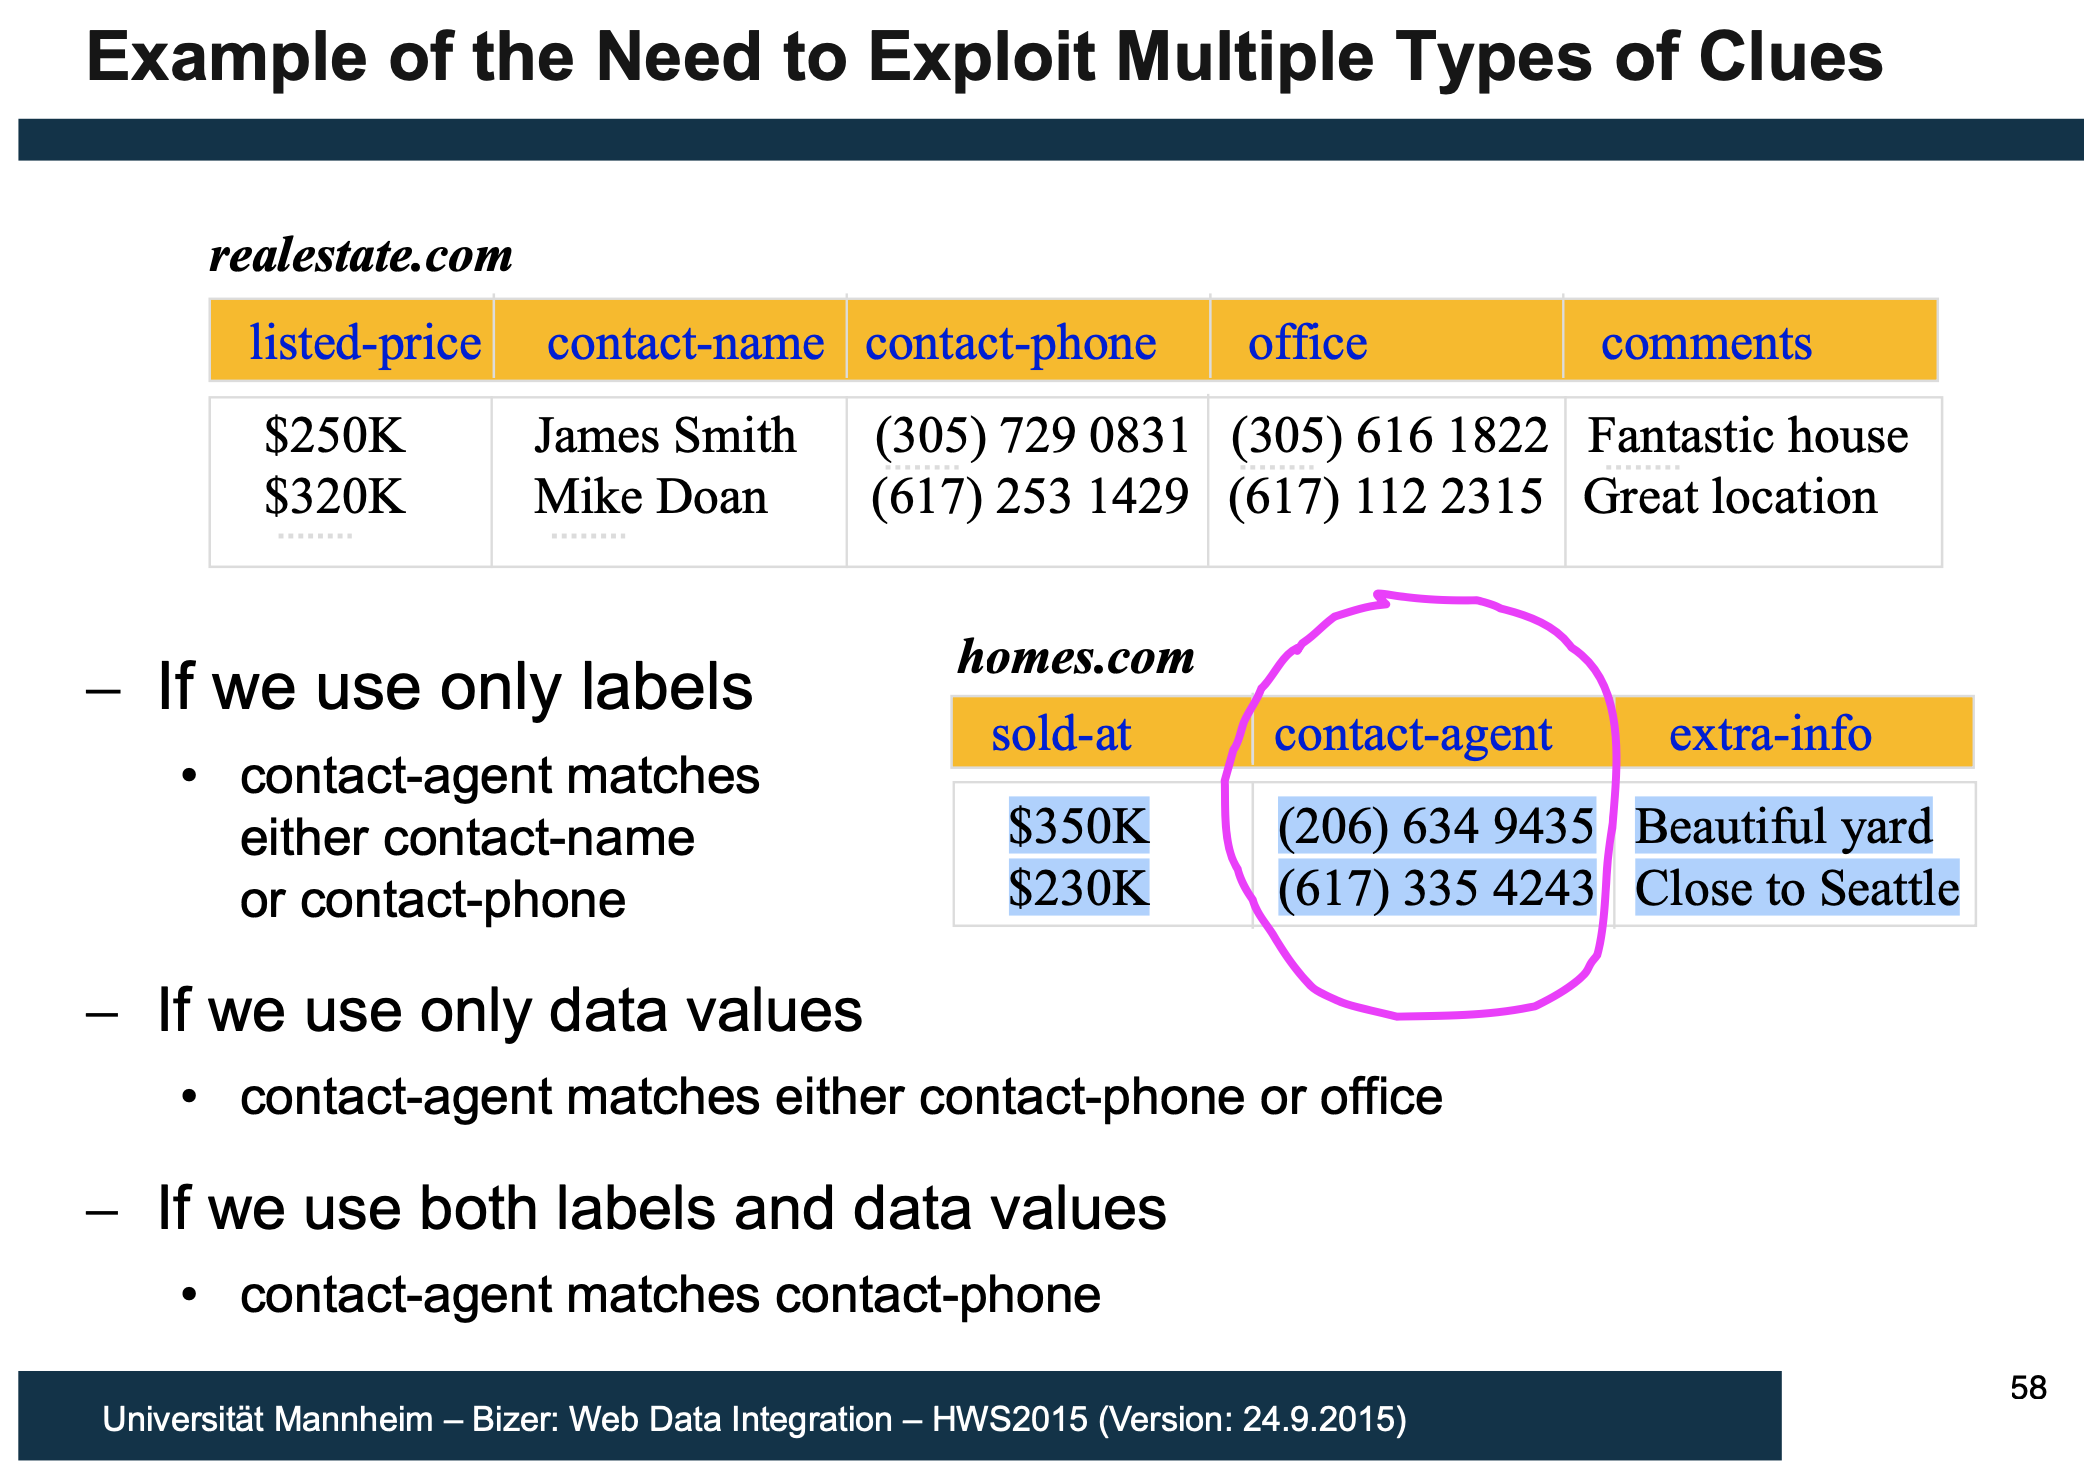

In [117]:
# Si crea il primo dataset
VALORI = [ ['listed-price', 'contact-name', 'contact-phone', 'office', 'comments'],
          ['$250K', 'James Smith', '(305) 729 0831', '(305) 616 1822', 'Fantastic house'],
          ['$320K', ' Mike Doan', '(617) 253 1429',  '(617) 112 2315', 'Great location']
         ]
header = VALORI.pop(0)
TableA = pd.DataFrame(VALORI, columns=header)
TableA

,listed-price,contact-name,contact-phone,office,comments
0,$250K,James Smith,(305) 729 0831,(305) 616 1822,Fantastic house
1,$320K,Mike Doan,(617) 253 1429,(617) 112 2315,Great location


In [118]:
# Si crea il secondo dataset
VALORI = [ ['sold-at', 'contact-agent', 'extra-info'],
          ['$350K', '(206) 634 9435' , 'Beautiful yard'],
          ['$230K', '(617) 335 4243', 'Close to Seattle']
         ]
header = VALORI.pop(0)
TableB = pd.DataFrame(VALORI, columns=header)
TableB

,sold-at,contact-agent,extra-info
0,$350K,(206) 634 9435,Beautiful yard
1,$230K,(617) 335 4243,Close to Seattle


In [119]:
SimTableLABEL=levenshtein_label_based_similarity(TableA,TableB)
SimTableLABEL

,A,B,sim
4,contact-name,contact-agent,0.692308
7,contact-phone,contact-agent,0.692308
13,comments,contact-agent,0.307692
0,listed-price,sold-at,0.250000
3,contact-name,sold-at,0.250000
12,comments,sold-at,0.250000
10,office,contact-agent,0.230769
2,listed-price,extra-info,0.166667
5,contact-name,extra-info,0.166667
1,listed-price,contact-agent,0.153846


In [120]:
top_K(SimTableLABEL,2,'B').sort_values(['B','sim'], ascending=[True,False])

,A,B,sim
4,contact-name,contact-agent,0.692308
7,contact-phone,contact-agent,0.692308
2,listed-price,extra-info,0.166667
5,contact-name,extra-info,0.166667
0,listed-price,sold-at,0.250000
3,contact-name,sold-at,0.250000


In [121]:
SimTableOVERLAP=jaccard_value_overlap_sim(TableA,TableB)
top_K(SimTableOVERLAP,2,'B').sort_values(['B','sim'], ascending=[True,False])

,A,B,sim
1,listed-price,contact-agent,0.0
4,contact-name,contact-agent,0.0
2,listed-price,extra-info,0.0
5,contact-name,extra-info,0.0
0,listed-price,sold-at,0.0
3,contact-name,sold-at,0.0


In [122]:
SimTableOVERLAP=generalized_value_overlap_sim(TableA,TableB,0.3)
TopK(SimTableOVERLAP,2,'B').sort_values(['B','sim'], ascending=[True,False])

,A,B,sim
7,contact-phone,contact-agent,0.416667
10,office,contact-agent,0.375000
2,listed-price,extra-info,0.000000
5,contact-name,extra-info,0.000000
0,listed-price,sold-at,0.750000
3,contact-name,sold-at,0.000000


In [123]:
X=pd.merge(SimTableLABEL,SimTableOVERLAP, on=['A','B'])
X=X.rename(columns={"sim_x": "SimTableLABEL", "sim_y": "SimTableOVERLAP"})
X

,A,B,SimTableLABEL,SimTableOVERLAP
0,contact-name,contact-agent,0.692308,0.000000
1,contact-phone,contact-agent,0.692308,0.416667
2,comments,contact-agent,0.307692,0.000000
3,listed-price,sold-at,0.250000,0.750000
4,contact-name,sold-at,0.250000,0.000000
5,comments,sold-at,0.250000,0.000000
6,office,contact-agent,0.230769,0.375000
7,listed-price,extra-info,0.166667,0.000000
8,contact-name,extra-info,0.166667,0.000000
9,listed-price,contact-agent,0.153846,0.000000


In [124]:
X['sim']=0.6*X['SimTableLABEL']+0.4*X['SimTableOVERLAP']
X

,A,B,SimTableLABEL,SimTableOVERLAP,sim
0,contact-name,contact-agent,0.692308,0.000000,0.415385
1,contact-phone,contact-agent,0.692308,0.416667,0.582051
2,comments,contact-agent,0.307692,0.000000,0.184615
3,listed-price,sold-at,0.250000,0.750000,0.450000
4,contact-name,sold-at,0.250000,0.000000,0.150000
5,comments,sold-at,0.250000,0.000000,0.150000
6,office,contact-agent,0.230769,0.375000,0.288462
7,listed-price,extra-info,0.166667,0.000000,0.100000
8,contact-name,extra-info,0.166667,0.000000,0.100000
9,listed-price,contact-agent,0.153846,0.000000,0.092308


In [125]:
max_sim_table([SimTableLABEL,SimTableOVERLAP])

,A,B,sim
0,comments,contact-agent,0.307692
1,comments,extra-info,0.100000
2,comments,sold-at,0.250000
3,contact-name,contact-agent,0.692308
4,contact-name,extra-info,0.166667
5,contact-name,sold-at,0.250000
6,contact-phone,contact-agent,0.692308
7,contact-phone,extra-info,0.153846
8,contact-phone,sold-at,0.153846
9,listed-price,contact-agent,0.153846


In [126]:
stable_marriage(X)

,A,B,sim,SimTableLABEL,SimTableOVERLAP
0,contact-phone,contact-agent,0.582051,0.692308,0.416667
1,listed-price,sold-at,0.450000,0.250000,0.750000
2,contact-name,extra-info,0.100000,0.166667,0.000000


In [127]:
# stable_marriage(X) usa la similarità specificata in 'sim',
# le altre due colonne si possono trascurare